# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 1000
LEARNING_RATE = 0.1
BATCH_SIZE = 512
ACTIVATION = "tanh"
N_HIDDEN = [512]
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def test_model():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512"
    return model, model_name

def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = test_model()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/1000
26/26 [==============================] - 2s 11ms/step - loss: 1.2645 - categorical_accuracy: 0.4497 - val_loss: 1.1589 - val_categorical_accuracy: 0.4820
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 1.1008 - categorical_accuracy: 0.5069 - val_loss: 1.0453 - val_categorical_accuracy: 0.5180
Epoch 3/1000
26/26 [==============================] - 0s 5ms/step - loss: 1.0080 - categorical_accuracy: 0.5443 - val_loss: 0.9731 - val_categorical_accuracy: 0.5608
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.9434 - categorical_accuracy: 0.5801 - val_loss: 0.9205 - val_categorical_accuracy: 0.5769
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8940 - categorical_accuracy: 0.6039 - val_loss: 0.8792 - val_categorical_accuracy: 0.5949
Epoch 6/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8547 - categorical_accuracy: 0.6267 - val_loss: 0.8459 - val_categorical_accuracy: 0.6141
Epo

26/26 [==============================] - 0s 7ms/step - loss: 0.5231 - categorical_accuracy: 0.7696 - val_loss: 0.5361 - val_categorical_accuracy: 0.7488
Epoch 51/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5214 - categorical_accuracy: 0.7695 - val_loss: 0.5343 - val_categorical_accuracy: 0.7481
Epoch 52/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5198 - categorical_accuracy: 0.7691 - val_loss: 0.5329 - val_categorical_accuracy: 0.7481
Epoch 53/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5182 - categorical_accuracy: 0.7695 - val_loss: 0.5316 - val_categorical_accuracy: 0.7519
Epoch 54/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5166 - categorical_accuracy: 0.7722 - val_loss: 0.5309 - val_categorical_accuracy: 0.7568
Epoch 55/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5152 - categorical_accuracy: 0.7726 - val_loss: 0.5279 - val_categorical_accuracy: 0.7562
Epoch 56/100

26/26 [==============================] - 0s 7ms/step - loss: 0.4727 - categorical_accuracy: 0.7933 - val_loss: 0.4877 - val_categorical_accuracy: 0.7816
Epoch 100/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4717 - categorical_accuracy: 0.7920 - val_loss: 0.4866 - val_categorical_accuracy: 0.7835
Epoch 101/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4712 - categorical_accuracy: 0.7928 - val_loss: 0.4854 - val_categorical_accuracy: 0.7823
Epoch 102/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4704 - categorical_accuracy: 0.7951 - val_loss: 0.4857 - val_categorical_accuracy: 0.7872
Epoch 103/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4699 - categorical_accuracy: 0.7940 - val_loss: 0.4846 - val_categorical_accuracy: 0.7804
Epoch 104/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4692 - categorical_accuracy: 0.7941 - val_loss: 0.4833 - val_categorical_accuracy: 0.7816
Epoch 1

Epoch 148/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4473 - categorical_accuracy: 0.8040 - val_loss: 0.4638 - val_categorical_accuracy: 0.7878
Epoch 149/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4469 - categorical_accuracy: 0.8059 - val_loss: 0.4643 - val_categorical_accuracy: 0.7835
Epoch 150/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4469 - categorical_accuracy: 0.8058 - val_loss: 0.4633 - val_categorical_accuracy: 0.7903
Epoch 151/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4463 - categorical_accuracy: 0.8048 - val_loss: 0.4643 - val_categorical_accuracy: 0.7897
Epoch 152/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4462 - categorical_accuracy: 0.8053 - val_loss: 0.4623 - val_categorical_accuracy: 0.7903
Epoch 153/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4453 - categorical_accuracy: 0.8057 - val_loss: 0.4633 - val_categorical_accuracy:

Epoch 197/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4339 - categorical_accuracy: 0.8103 - val_loss: 0.4526 - val_categorical_accuracy: 0.7996
Epoch 198/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4338 - categorical_accuracy: 0.8110 - val_loss: 0.4525 - val_categorical_accuracy: 0.7953
Epoch 199/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4333 - categorical_accuracy: 0.8110 - val_loss: 0.4520 - val_categorical_accuracy: 0.7971
Epoch 200/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4333 - categorical_accuracy: 0.8104 - val_loss: 0.4530 - val_categorical_accuracy: 0.7984
Epoch 201/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4330 - categorical_accuracy: 0.8112 - val_loss: 0.4524 - val_categorical_accuracy: 0.7978
Epoch 202/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4328 - categorical_accuracy: 0.8118 - val_loss: 0.4539 - val_categorical_accuracy:

Epoch 246/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4254 - categorical_accuracy: 0.8143 - val_loss: 0.4464 - val_categorical_accuracy: 0.7990
Epoch 247/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4250 - categorical_accuracy: 0.8141 - val_loss: 0.4465 - val_categorical_accuracy: 0.8015
Epoch 248/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4253 - categorical_accuracy: 0.8139 - val_loss: 0.4474 - val_categorical_accuracy: 0.7984
Epoch 249/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4246 - categorical_accuracy: 0.8140 - val_loss: 0.4464 - val_categorical_accuracy: 0.8009
Epoch 250/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4245 - categorical_accuracy: 0.8138 - val_loss: 0.4467 - val_categorical_accuracy: 0.8002
Epoch 251/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4247 - categorical_accuracy: 0.8148 - val_loss: 0.4462 - val_categorical_accuracy:

Epoch 295/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4186 - categorical_accuracy: 0.8171 - val_loss: 0.4471 - val_categorical_accuracy: 0.8040
Epoch 296/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4186 - categorical_accuracy: 0.8184 - val_loss: 0.4430 - val_categorical_accuracy: 0.8089
Epoch 297/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4185 - categorical_accuracy: 0.8172 - val_loss: 0.4439 - val_categorical_accuracy: 0.8071
Epoch 298/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4183 - categorical_accuracy: 0.8183 - val_loss: 0.4435 - val_categorical_accuracy: 0.8089
Epoch 299/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4179 - categorical_accuracy: 0.8169 - val_loss: 0.4460 - val_categorical_accuracy: 0.8002
Epoch 300/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4182 - categorical_accuracy: 0.8176 - val_loss: 0.4429 - val_categorical_accuracy:

Epoch 344/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4134 - categorical_accuracy: 0.8203 - val_loss: 0.4409 - val_categorical_accuracy: 0.8083
Epoch 345/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4129 - categorical_accuracy: 0.8190 - val_loss: 0.4397 - val_categorical_accuracy: 0.8114
Epoch 346/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4128 - categorical_accuracy: 0.8218 - val_loss: 0.4405 - val_categorical_accuracy: 0.8033
Epoch 347/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4128 - categorical_accuracy: 0.8207 - val_loss: 0.4404 - val_categorical_accuracy: 0.8089
Epoch 348/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4126 - categorical_accuracy: 0.8198 - val_loss: 0.4408 - val_categorical_accuracy: 0.8133
Epoch 349/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4125 - categorical_accuracy: 0.8215 - val_loss: 0.4415 - val_categorical_accuracy:

Epoch 393/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4083 - categorical_accuracy: 0.8226 - val_loss: 0.4404 - val_categorical_accuracy: 0.8046
Epoch 394/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4080 - categorical_accuracy: 0.8231 - val_loss: 0.4382 - val_categorical_accuracy: 0.8145
Epoch 395/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4081 - categorical_accuracy: 0.8222 - val_loss: 0.4387 - val_categorical_accuracy: 0.8089
Epoch 396/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4081 - categorical_accuracy: 0.8227 - val_loss: 0.4384 - val_categorical_accuracy: 0.8052
Epoch 397/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4083 - categorical_accuracy: 0.8221 - val_loss: 0.4379 - val_categorical_accuracy: 0.8120
Epoch 398/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4079 - categorical_accuracy: 0.8220 - val_loss: 0.4382 - val_categorical_accuracy:

Epoch 442/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4041 - categorical_accuracy: 0.8242 - val_loss: 0.4363 - val_categorical_accuracy: 0.8102
Epoch 443/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4039 - categorical_accuracy: 0.8250 - val_loss: 0.4359 - val_categorical_accuracy: 0.8114
Epoch 444/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4036 - categorical_accuracy: 0.8250 - val_loss: 0.4378 - val_categorical_accuracy: 0.8102
Epoch 445/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4039 - categorical_accuracy: 0.8239 - val_loss: 0.4354 - val_categorical_accuracy: 0.8120
Epoch 446/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4036 - categorical_accuracy: 0.8245 - val_loss: 0.4372 - val_categorical_accuracy: 0.8083
Epoch 447/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4035 - categorical_accuracy: 0.8259 - val_loss: 0.4355 - val_categorical_accuracy:

Epoch 491/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4004 - categorical_accuracy: 0.8262 - val_loss: 0.4351 - val_categorical_accuracy: 0.8133
Epoch 492/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4004 - categorical_accuracy: 0.8265 - val_loss: 0.4342 - val_categorical_accuracy: 0.8058
Epoch 493/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4002 - categorical_accuracy: 0.8262 - val_loss: 0.4348 - val_categorical_accuracy: 0.8071
Epoch 494/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4002 - categorical_accuracy: 0.8248 - val_loss: 0.4357 - val_categorical_accuracy: 0.8009
Epoch 495/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4003 - categorical_accuracy: 0.8261 - val_loss: 0.4357 - val_categorical_accuracy: 0.8114
Epoch 496/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4001 - categorical_accuracy: 0.8247 - val_loss: 0.4354 - val_categorical_accuracy:

Epoch 540/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3968 - categorical_accuracy: 0.8274 - val_loss: 0.4339 - val_categorical_accuracy: 0.8058
Epoch 541/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3969 - categorical_accuracy: 0.8284 - val_loss: 0.4336 - val_categorical_accuracy: 0.8052
Epoch 542/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3967 - categorical_accuracy: 0.8272 - val_loss: 0.4338 - val_categorical_accuracy: 0.8127
Epoch 543/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3963 - categorical_accuracy: 0.8281 - val_loss: 0.4328 - val_categorical_accuracy: 0.8102
Epoch 544/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3969 - categorical_accuracy: 0.8280 - val_loss: 0.4326 - val_categorical_accuracy: 0.8089
Epoch 545/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3968 - categorical_accuracy: 0.8290 - val_loss: 0.4325 - val_categorical_accuracy:

Epoch 589/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3937 - categorical_accuracy: 0.8294 - val_loss: 0.4346 - val_categorical_accuracy: 0.8114
Epoch 590/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3941 - categorical_accuracy: 0.8290 - val_loss: 0.4311 - val_categorical_accuracy: 0.8096
Epoch 591/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3937 - categorical_accuracy: 0.8281 - val_loss: 0.4314 - val_categorical_accuracy: 0.8089
Epoch 592/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3939 - categorical_accuracy: 0.8280 - val_loss: 0.4327 - val_categorical_accuracy: 0.8120
Epoch 593/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3938 - categorical_accuracy: 0.8287 - val_loss: 0.4331 - val_categorical_accuracy: 0.8096
Epoch 594/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3935 - categorical_accuracy: 0.8306 - val_loss: 0.4316 - val_categorical_accuracy:

Epoch 638/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3913 - categorical_accuracy: 0.8317 - val_loss: 0.4307 - val_categorical_accuracy: 0.8114
Epoch 639/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3910 - categorical_accuracy: 0.8293 - val_loss: 0.4319 - val_categorical_accuracy: 0.8145
Epoch 640/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3910 - categorical_accuracy: 0.8305 - val_loss: 0.4314 - val_categorical_accuracy: 0.8096
Epoch 641/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3910 - categorical_accuracy: 0.8310 - val_loss: 0.4321 - val_categorical_accuracy: 0.8071
Epoch 642/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3908 - categorical_accuracy: 0.8312 - val_loss: 0.4312 - val_categorical_accuracy: 0.8120
Epoch 643/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3908 - categorical_accuracy: 0.8312 - val_loss: 0.4329 - val_categorical_accuracy:

Epoch 687/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3885 - categorical_accuracy: 0.8319 - val_loss: 0.4320 - val_categorical_accuracy: 0.8114
Epoch 688/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3882 - categorical_accuracy: 0.8303 - val_loss: 0.4314 - val_categorical_accuracy: 0.8102
Epoch 689/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3882 - categorical_accuracy: 0.8321 - val_loss: 0.4319 - val_categorical_accuracy: 0.8058
Epoch 690/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3884 - categorical_accuracy: 0.8319 - val_loss: 0.4303 - val_categorical_accuracy: 0.8139
Epoch 691/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3878 - categorical_accuracy: 0.8313 - val_loss: 0.4313 - val_categorical_accuracy: 0.8114
Epoch 692/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3880 - categorical_accuracy: 0.8312 - val_loss: 0.4300 - val_categorical_accuracy:

Epoch 736/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3855 - categorical_accuracy: 0.8334 - val_loss: 0.4297 - val_categorical_accuracy: 0.8127
Epoch 737/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3854 - categorical_accuracy: 0.8335 - val_loss: 0.4329 - val_categorical_accuracy: 0.8133
Epoch 738/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3856 - categorical_accuracy: 0.8338 - val_loss: 0.4305 - val_categorical_accuracy: 0.8108
Epoch 739/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3855 - categorical_accuracy: 0.8336 - val_loss: 0.4312 - val_categorical_accuracy: 0.8077
Epoch 740/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3855 - categorical_accuracy: 0.8331 - val_loss: 0.4309 - val_categorical_accuracy: 0.8139
Epoch 741/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3849 - categorical_accuracy: 0.8329 - val_loss: 0.4316 - val_categorical_accuracy:

Epoch 785/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3830 - categorical_accuracy: 0.8349 - val_loss: 0.4309 - val_categorical_accuracy: 0.8108
Epoch 786/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3836 - categorical_accuracy: 0.8348 - val_loss: 0.4293 - val_categorical_accuracy: 0.8139
Epoch 787/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3829 - categorical_accuracy: 0.8355 - val_loss: 0.4317 - val_categorical_accuracy: 0.8089
Epoch 788/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3829 - categorical_accuracy: 0.8341 - val_loss: 0.4327 - val_categorical_accuracy: 0.8158
Epoch 789/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3830 - categorical_accuracy: 0.8350 - val_loss: 0.4349 - val_categorical_accuracy: 0.8114
Epoch 790/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3829 - categorical_accuracy: 0.8344 - val_loss: 0.4346 - val_categorical_accuracy:

Epoch 834/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3807 - categorical_accuracy: 0.8359 - val_loss: 0.4350 - val_categorical_accuracy: 0.8114
Epoch 835/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3805 - categorical_accuracy: 0.8348 - val_loss: 0.4332 - val_categorical_accuracy: 0.8201
Epoch 836/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3807 - categorical_accuracy: 0.8352 - val_loss: 0.4294 - val_categorical_accuracy: 0.8120
Epoch 837/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3801 - categorical_accuracy: 0.8357 - val_loss: 0.4308 - val_categorical_accuracy: 0.8120
Epoch 838/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3805 - categorical_accuracy: 0.8361 - val_loss: 0.4294 - val_categorical_accuracy: 0.8108
Epoch 839/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3804 - categorical_accuracy: 0.8372 - val_loss: 0.4331 - val_categorical_accuracy:

Epoch 883/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3782 - categorical_accuracy: 0.8362 - val_loss: 0.4292 - val_categorical_accuracy: 0.8114
Epoch 884/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3783 - categorical_accuracy: 0.8378 - val_loss: 0.4300 - val_categorical_accuracy: 0.8158
Epoch 885/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3780 - categorical_accuracy: 0.8373 - val_loss: 0.4297 - val_categorical_accuracy: 0.8164
Epoch 886/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3785 - categorical_accuracy: 0.8383 - val_loss: 0.4337 - val_categorical_accuracy: 0.8127
Epoch 887/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3780 - categorical_accuracy: 0.8386 - val_loss: 0.4296 - val_categorical_accuracy: 0.8120
Epoch 888/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3783 - categorical_accuracy: 0.8362 - val_loss: 0.4334 - val_categorical_accuracy:

Epoch 932/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3758 - categorical_accuracy: 0.8395 - val_loss: 0.4301 - val_categorical_accuracy: 0.8145
Epoch 933/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3754 - categorical_accuracy: 0.8379 - val_loss: 0.4298 - val_categorical_accuracy: 0.8170
Epoch 934/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3756 - categorical_accuracy: 0.8387 - val_loss: 0.4293 - val_categorical_accuracy: 0.8145
Epoch 935/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3756 - categorical_accuracy: 0.8381 - val_loss: 0.4304 - val_categorical_accuracy: 0.8114
Epoch 936/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3758 - categorical_accuracy: 0.8392 - val_loss: 0.4345 - val_categorical_accuracy: 0.8096
Epoch 937/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3759 - categorical_accuracy: 0.8379 - val_loss: 0.4359 - val_categorical_accuracy:

Epoch 981/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3736 - categorical_accuracy: 0.8390 - val_loss: 0.4328 - val_categorical_accuracy: 0.8114
Epoch 982/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3733 - categorical_accuracy: 0.8407 - val_loss: 0.4328 - val_categorical_accuracy: 0.8145
Epoch 983/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3731 - categorical_accuracy: 0.8403 - val_loss: 0.4288 - val_categorical_accuracy: 0.8120
Epoch 984/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3731 - categorical_accuracy: 0.8404 - val_loss: 0.4316 - val_categorical_accuracy: 0.8170
Epoch 985/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.3732 - categorical_accuracy: 0.8406 - val_loss: 0.4295 - val_categorical_accuracy: 0.8089
Epoch 986/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.3731 - categorical_accuracy: 0.8408 - val_loss: 0.4296 - val_categorical_accuracy:

## Step 7: Analyze results

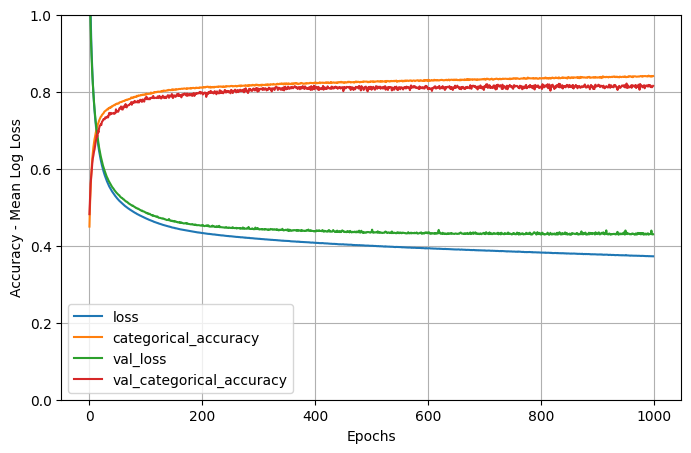

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_accuracy = round(results.categorical_accuracy.values[-1:][0]*100, 2)
val_accuracy = round(results.val_categorical_accuracy.values[-1:][0]*100, 2)
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 2)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2)
human_error = 5
bias = round(training_error - human_error, 2)
variance = round(test_error - training_error, 2)
training_time = round(end_time - start_time)
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ", training_time, "seconds")

Error (training): 15.95 %
Error (test): 18.49 %
Bias: 10.95
Variance: 2.54
Time:  199 seconds


## Step 8: Save results

In [13]:
RESULTS_FOLDER = "../Results"
RESULTS_FILE = f"{RESULTS_FOLDER}/models_performance.csv"

In [14]:
results_df = pd.read_csv(RESULTS_FILE, index_col = 0)

In [15]:
COLUMNS = [
    'model_name',
    'epochs',
    'learning_rate',
    'batch_size',
    'activation',
    'loss',
    'optimizer',
    'regularization',
    'train_accuracy',
    'validation_accuracy',
    'bias',
    'variance',
    'training_time'
]

new_result = [[
    model_name,
    N_EPOCHS,
    LEARNING_RATE,
    BATCH_SIZE,
    ACTIVATION,
    "categorical_crossentropy",
    "SGD",
    "",
    training_accuracy,
    val_accuracy,
    bias,
    variance,
    training_time]]

new_result_df = pd.DataFrame(new_result, columns=COLUMNS)
concatenation = pd.concat([results_df, new_result_df], ignore_index=True)
concatenation.to_csv(RESULTS_FILE)


In [16]:
last_five = concatenation.tail(5)
print(last_five)
print("\n---Metrics---")
print(last_five[["train_accuracy", "validation_accuracy", "bias", "variance", "training_time"]].describe())

  model_name  epochs  learning_rate  batch_size activation  \
5       D512    1000            0.1         512       relu   
6       D512    1000            0.1         512       relu   
7       D512    1000            0.1         512       relu   
8       D512    1000            0.1         512       relu   
9       D512    1000            0.1         512       relu   

                       loss optimizer regularization  train_accuracy  \
5  categorical_crossentropy       SGD            NaN           84.07   
6  categorical_crossentropy       SGD            NaN           84.03   
7  categorical_crossentropy       SGD            NaN           84.00   
8  categorical_crossentropy       SGD            NaN           83.99   
9  categorical_crossentropy       SGD                          84.05   

   validation_accuracy   bias  variance  training_time  
5                81.45  10.93      2.62            186  
6                81.70  10.97      2.33            211  
7                81.33 

In [17]:
MODELS_FOLDER = "../Models"
save_name = f"{MODELS_FOLDER}/{model_name}-2.h5"
my_model.save(save_name)